In [15]:
from preprocess import load_data
import numpy as np
import RegularizedLogisticRegression
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
#Using 7 baseline methods to predict and compute results' AUC.
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
import glob
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

import importlib
import preprocess
from CV import find_maximum, find_minimum
importlib.reload(RegularizedLogisticRegression)

<module 'RegularizedLogisticRegression' from '/Users/calebziems/Documents/SCHOOL/Machine Learning/breast-cancer-prediction/src/RegularizedLogisticRegression.py'>

In [103]:
np.arange(0.5, 0.76, 0.05)

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75])

In [104]:
def plot_errors(means, stds, lambdas, min_index, opt_index, y_lbl="Classification Error", title="Errors", param_name="\lambda", save="errs.png", log=True):
    # prepare datapoints
    means_min = means[min_index]
    lambda_min = lambdas[min_index]
    std_min = stds[min_index]
    means_opt = means[opt_index]
    lambda_opt = lambdas[opt_index]

    # setup plot
    x_ax = lambdas
    if log:
        x_ax = np.log10(lambdas)
    plt.figure(figsize=(7, 7))
    ax = plt.axes()
    ax.set_yticks(np.arange(0.5, 0.76, 0.05))
    ax.set_ylim(bottom=0.45, top=0.8)

    # plot mu and mu_err
    plt.plot(x_ax, means, color='black', label="$\mu$")
    plt.plot(x_ax, means + stds, color='red', label="$\mu \pm \sigma$")
    plt.plot(x_ax, means - stds, color='red')

    # plot lambda min
    plt.plot(x_ax, [means_min + std_min]*len(x_ax), color='blue', linestyle='dashed')
    plt.plot(x_ax, [means_min - std_min]*len(x_ax), color='blue', linestyle='dashed')
    if log:
        plt.plot(np.log10([lambda_min]*10), np.linspace(*ax.get_ylim(), 10), color='blue', linestyle='dashed')
        plt.scatter(np.log10([lambda_min]), [means_min], s=80, facecolors='none', edgecolors='b', label="$%s_{opt}$" % param_name)
    else:
        plt.plot([lambda_min]*10, np.linspace(*ax.get_ylim(), 10), color='blue', linestyle='dashed')
        plt.scatter([lambda_min], [means_min], s=80, facecolors='none', edgecolors='b', label="$%s_{opt}$" % param_name)

    # plot optimal
    if log:
        plt.plot(np.log10([lambda_opt]*10), np.linspace(*ax.get_ylim(), 10), color='green', linestyle='dashed')
        plt.scatter(np.log10([lambda_opt]), [means_opt], s=80, facecolors='none', edgecolors='g', label="$%s^*$" % param_name)
    else:
        plt.plot([lambda_opt]*10, np.linspace(*ax.get_ylim(), 10), color='green', linestyle='dashed')
        plt.scatter([lambda_opt], [means_opt], s=80, facecolors='none', edgecolors='g', label="$%s^*$" % param_name)

       
    x_lbl = "$%s$" % param_name
    if log:
        x_lbl="$\log_{10}(%s)$" % param_name
    # finish
    plt.legend(loc='upper right')
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.title(title)
    plt.show()

In [58]:
plt.rcParams.update({'font.size': 18})

# SGD

In [105]:
X = pd.read_csv("CV/SGD_0.95/SGD_lambda_clinical_4_X.csv", header=None)
Y = pd.read_csv("CV/SGD_0.95/SGD_lambda_clinical_4_Y.csv", header=None)
params = X.values[0]
get_max = True
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

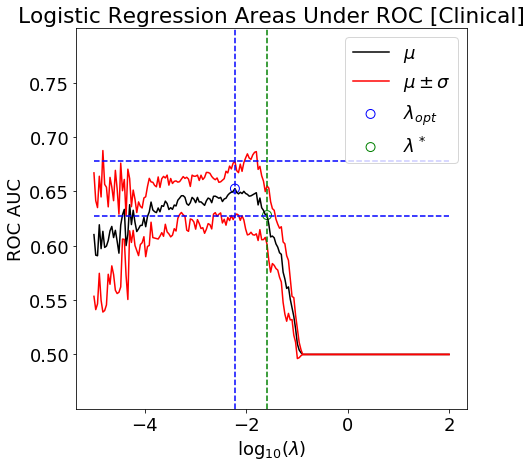

In [106]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="Logistic Regression Areas Under ROC [Clinical]", save=None, param_name="\lambda", log=True)



In [107]:
X = pd.read_csv("CV/SGD_0.95/SGD_lambda_genomic_2_X.csv", header=None)
Y = pd.read_csv("CV/SGD_0.95/SGD_lambda_genomic_2_Y.csv", header=None)
params = X.values[0]
get_max = True
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

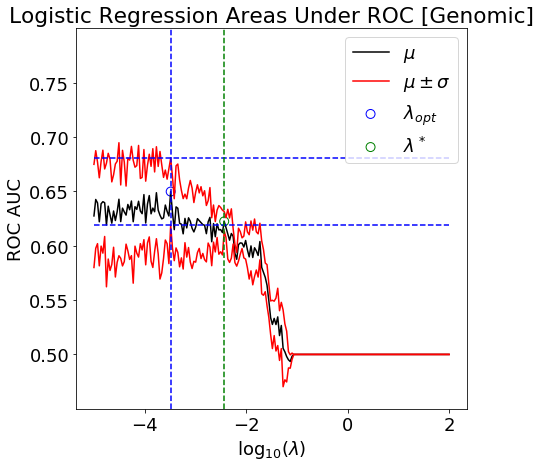

In [108]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="Logistic Regression Areas Under ROC [Genomic]", save=None, param_name="\lambda", log=True)



# SVC

In [117]:
X = pd.read_csv("CV/SVC_linear/linear_svc_C_clinical_4_X.csv", header=None)
Y = pd.read_csv("CV/SVC_linear/linear_svc_C_clinical_4_Y.csv", header=None)
params = X.values[0]
get_max = False
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

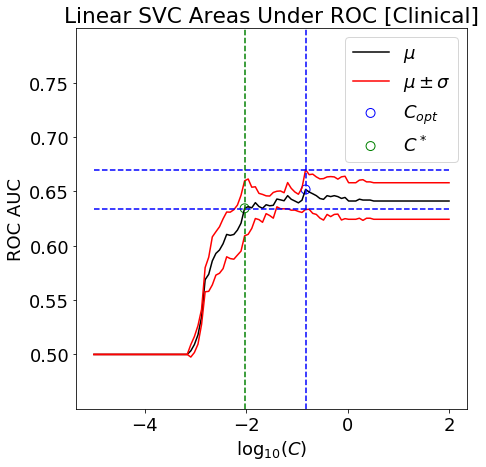

In [118]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="Linear SVC Areas Under ROC [Clinical]", save=None, param_name="C", log=True)



In [119]:
X = pd.read_csv("CV/SVC_linear/linear_svc_C_genomic_2_X.csv", header=None)
Y = pd.read_csv("CV/SVC_linear/linear_svc_C_genomic_2_Y.csv", header=None)
params = X.values[0]
get_max = False
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

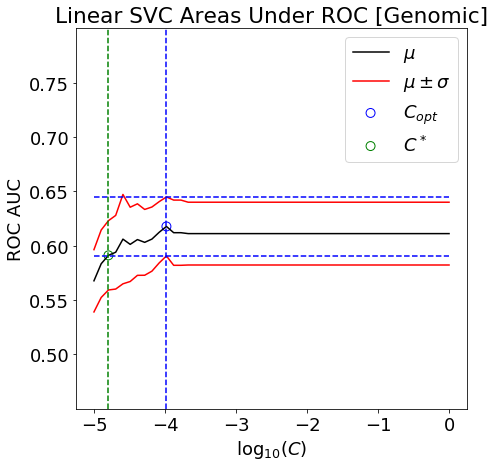

In [120]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="Linear SVC Areas Under ROC [Genomic]", save=None, param_name="C", log=True)



In [112]:
X = pd.read_csv("CV/SVC_rbf/rbf_svc_C_clinical_3_X.csv", header=None)
Y = pd.read_csv("CV/SVC_rbf/rbf_svc_C_clinical_3_Y.csv", header=None)
params = X.values[0]
get_max = False
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

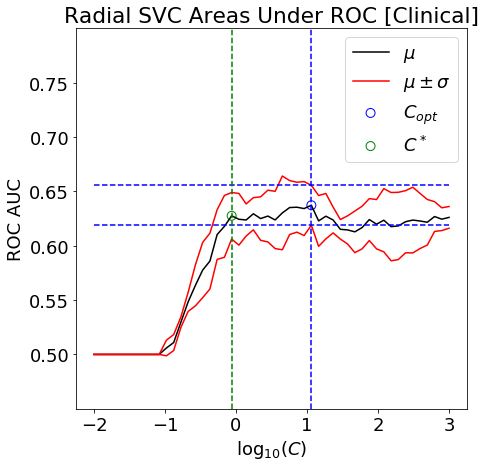

In [114]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="Radial SVC Areas Under ROC [Clinical]", save=None, param_name="C", log=True)



In [115]:
X = pd.read_csv("CV/SVC_rbf/rbf_svc_C_genomic_3_X.csv", header=None)
Y = pd.read_csv("CV/SVC_rbf/rbf_svc_C_genomic_3_Y.csv", header=None)
params = X.values[0]
get_max = False
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

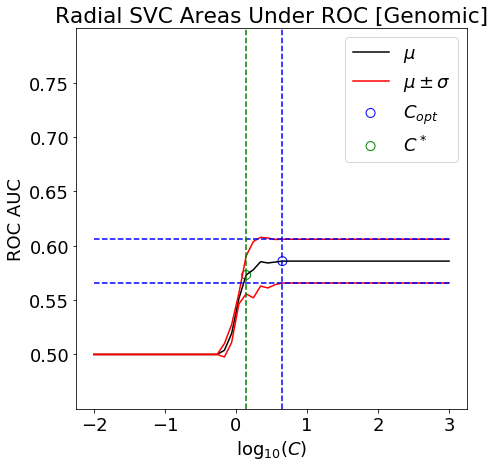

In [116]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="Radial SVC Areas Under ROC [Genomic]", save=None, param_name="C", log=True)



# Random Forest

In [121]:
X = pd.read_csv("CV/RandomForest/Random_forest_n_estimators_clinical_5_X.csv", header=None)
Y = pd.read_csv("CV/RandomForest/Random_forest_n_estimators_clinical_5_Y.csv", header=None)
params = X.values[0]
get_max = True
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

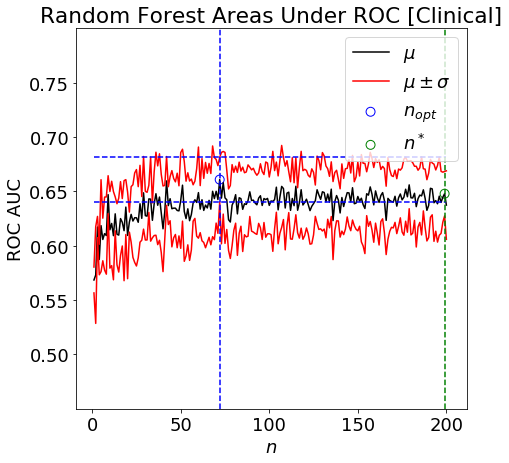

In [123]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="Random Forest Areas Under ROC [Clinical]", save=None, param_name="n", log=False)



# Stretch: L1 Logistic Regression

In [129]:
X = pd.read_csv("CV/RegLR_1/reg_lr_lambda_clinical_4_X.csv", header=None)
Y = pd.read_csv("CV/RegLR_1/reg_lr_lambda_clinical_4_Y.csv", header=None)
params = X.values[0]
get_max = True
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

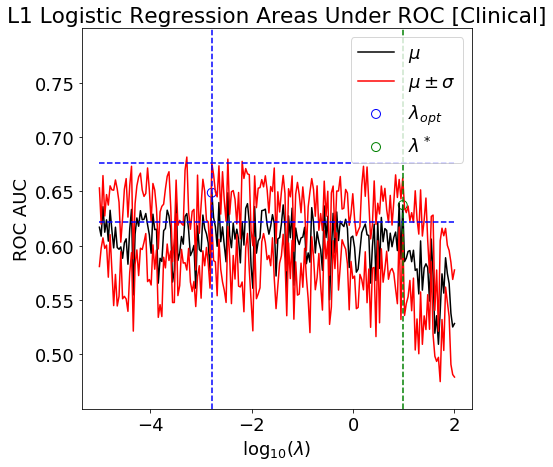

In [130]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="L1 Logistic Regression Areas Under ROC [Clinical]", save=None, param_name="\lambda", log=True)



In [131]:
X = pd.read_csv("CV/RegLR_1/reg_lr_lambda_genomic_3_X.csv", header=None)
Y = pd.read_csv("CV/RegLR_1/reg_lr_lambda_genomic_3_Y.csv", header=None)
params = X.values[0]
get_max = True
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

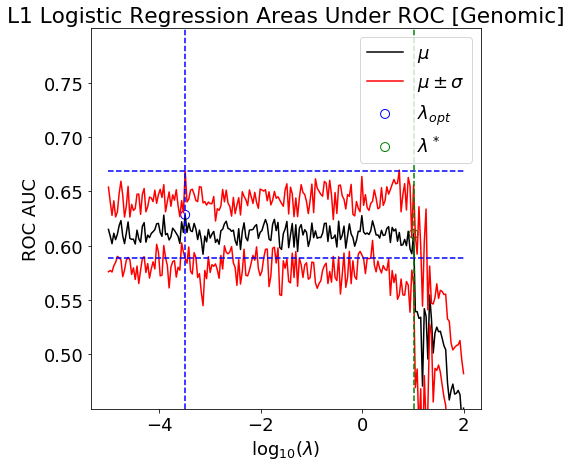

In [132]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="L1 Logistic Regression Areas Under ROC [Genomic]", save=None, param_name="\lambda", log=True)



# Scikit-Learn L1

In [134]:
X = pd.read_csv("CV/SGD_1/SGD_lambda_clinical_1_X.csv", header=None)
Y = pd.read_csv("CV/SGD_1/SGD_lambda_clinical_1_Y.csv", header=None)
params = X.values[0]
get_max = True
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

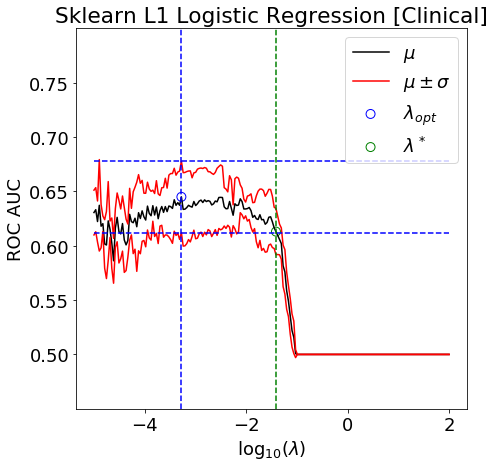

In [135]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="Sklearn L1 Logistic Regression [Clinical]", save=None, param_name="\lambda", log=True)



In [137]:
X = pd.read_csv("CV/SGD_1/SGD_L1_lambda_genomic_5_X.csv", header=None)
Y = pd.read_csv("CV/SGD_1/SGD_L1_lambda_genomic_5_Y.csv", header=None)
params = X.values[0]
get_max = True
means = np.mean(Y, axis=0)
stds = np.std(Y, axis=0)

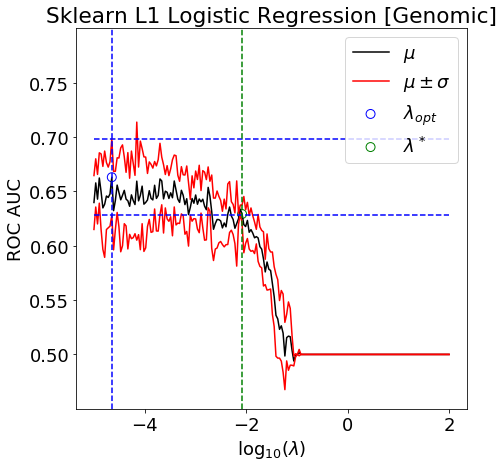

In [138]:
scrs = Y
    
means = np.mean(scrs, axis=0)
stds = np.std(scrs, axis=0)

max_index = np.argmax(means)
std_max = stds[max_index]
if get_max:
    opt_index = find_maximum(means, max_index, std_max)
else:
    opt_index = find_minimum(means, max_index, std_max)

opt_param = params[opt_index]

plot_errors(means, stds, params, max_index, opt_index, y_lbl="ROC AUC", title="Sklearn L1 Logistic Regression [Genomic]", save=None, param_name="\lambda", log=True)

